**Residential Load**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

Import csv data from https://data.sccer-jasm.ch/demand-hourly-profile-retrofits-cesar/jasm-demand-hourly-profile-retrofits-cesar-2020-09-17.zip
(https://www.sciencedirect.com/science/article/pii/S0378778819319486)

In [3]:
os.chdir('/home/MA')

In [4]:
load_hawaii = pd.read_csv('Data/USA_HI_Honolulu.Intl.AP_residential_load.csv')

In [5]:
list(load_hawaii.columns.values)

['Date/Time',
 'Electricity:Facility [kW](Hourly)',
 'Gas:Facility [kW](Hourly)',
 'Heating:Electricity [kW](Hourly)',
 'Cooling:Electricity [kW](Hourly)',
 'HVACFan:Fans:Electricity [kW](Hourly)',
 'Electricity:HVAC [kW](Hourly)',
 'Fans:Electricity [kW](Hourly)',
 'General:InteriorLights:Electricity [kW](Hourly)',
 'General:ExteriorLights:Electricity [kW](Hourly)',
 'Appl:InteriorEquipment:Electricity [kW](Hourly)',
 'Misc:InteriorEquipment:Electricity [kW](Hourly)',
 'Water Heater:WaterSystems:Electricity [kW](Hourly) ']

In [6]:
load_hawaii['Date/Time'] = pd.to_datetime(load_hawaii['Date/Time'], format=' %m/%d  %H:%M:%S')

In [7]:
load_hawaii = load_hawaii.set_index([load_hawaii['Date/Time'].dt.month, load_hawaii['Date/Time'].dt.day, load_hawaii['Date/Time'].dt.hour])

In [8]:
load_hawaii.index.names = ["month", "day", "hour"]

In [9]:
load_hawaii.tail(10)

Date/Time  Electricity:Facility [kW](Hourly)  \
month day hour                                                          
12    31  15   1900-12-31 15:00:00                           1.654776   
          16   1900-12-31 16:00:00                           1.706504   
          17   1900-12-31 17:00:00                           2.014954   
          18   1900-12-31 18:00:00                           2.552598   
          19   1900-12-31 19:00:00                           2.955289   
          20   1900-12-31 20:00:00                           2.807134   
          21   1900-12-31 21:00:00                           2.648401   
          22   1900-12-31 22:00:00                           2.406917   
          23   1900-12-31 23:00:00                           1.956111   
          0    1900-12-31 00:00:00                           1.505899   

                Gas:Facility [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
month day hour                                                                
12    31  15                            0                                 0   
          16                            0                                 0   
          17                            0                                 0   
          18                            0                                 0   
          19                            0                                 0   
          20                            0                                 0   
          21                            0                                 0   
          22                            0                                 0   
          23                            0                                 0   
          0                             0                                 0   

                Cooling:Electricity [kW](Hourly)  \
month day hour                                     
12    31  15                            0.376217   
          16                            0.347954   
          17                            0.339842   
          18                            0.341118   
          19                            0.412298   
          20                            0.396787   
          21                            0.374093   
          22                            0.342087   
          23                            0.291188   
          0                             0.239971   

                HVACFan:Fans:Electricity [kW](Hourly)  \
month day hour                                          
12    31  15                                 0.119649   
          16                                 0.112938   
          17                                 0.112206   
          18                                 0.113281   
          19                                 0.137496   
          20                                 0.133045   
          21                                 0.125095   
          22                                 0.114076   
          23                                 0.096829   
          0                                  0.079219   

                Electricity:HVAC [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
month day hour                                                                 
12    31  15                         0.495866                       0.119649   
          16                         0.460892                       0.112938   
          17                         0.452048                       0.112206   
          18                         0.454399                       0.113281   
          19                         0.549794                       0.137496   
          20                         0.529832                       0.133045   
          21                         0.499188                       0.125095   
          22                         0.456164                       0.114076   
          23                         0.388018                       0.096829   
         

Plot first daily profile

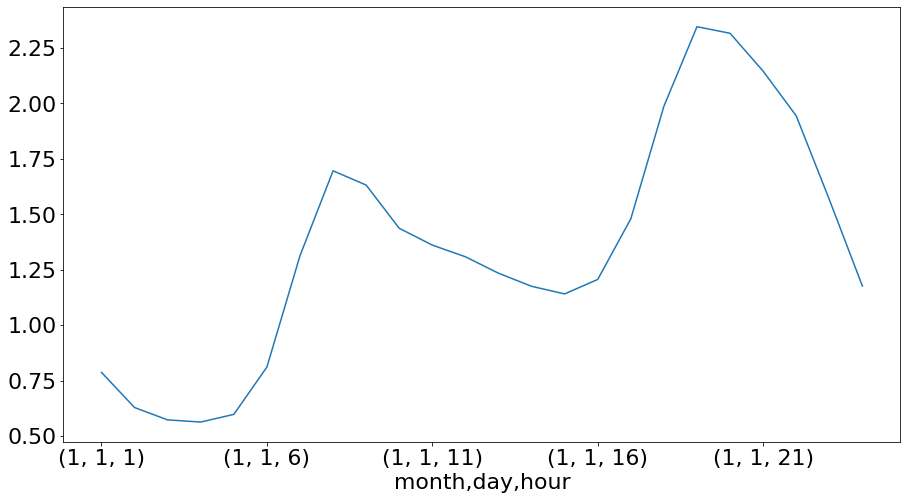

In [10]:
load_hawaii['Electricity:Facility [kW](Hourly)'].head(24).plot();

Plot monthly profile in January

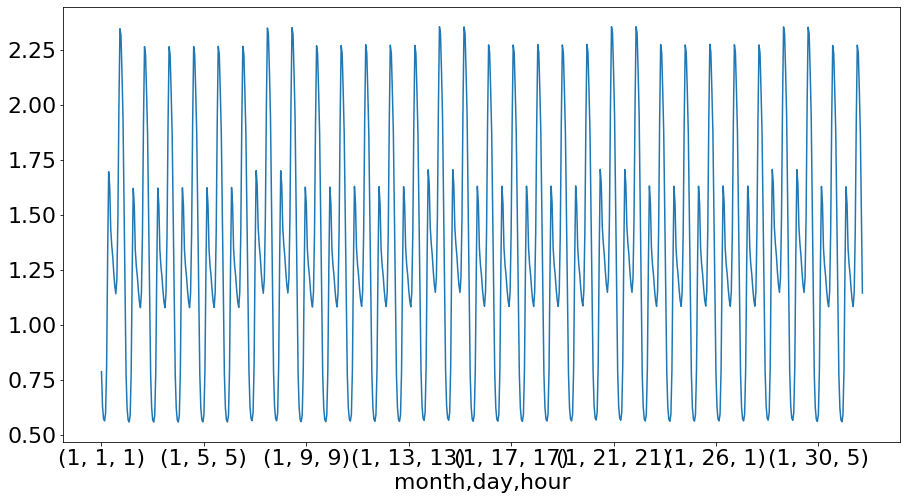

In [11]:
load_hawaii['Electricity:Facility [kW](Hourly)'].head(744).plot();

Compare this to another month's value to see whether electricity consumption changes seasonally.

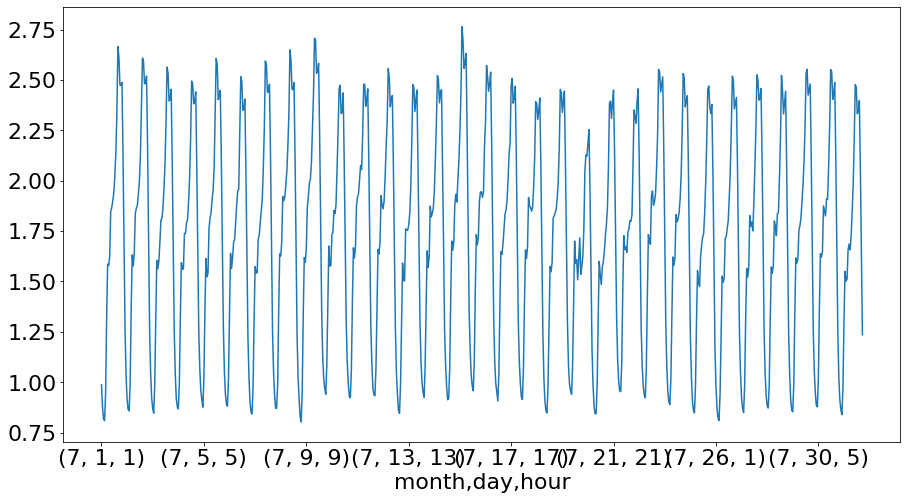

In [12]:
load_hawaii['Electricity:Facility [kW](Hourly)'].iloc[load_hawaii.index.get_level_values('month') == 7].plot();

It does not, hence heating demand supposedly is decoupled from electricity demand, only appliances are considered. We need to find a metric to include electricity demand by heating (heat pumps consumption, direct electrical heating).

Same procedure for single family homes

In [13]:
load_hawaii['Electricity:Facility [kW](Hourly)'].mean()

1.6523536951997715

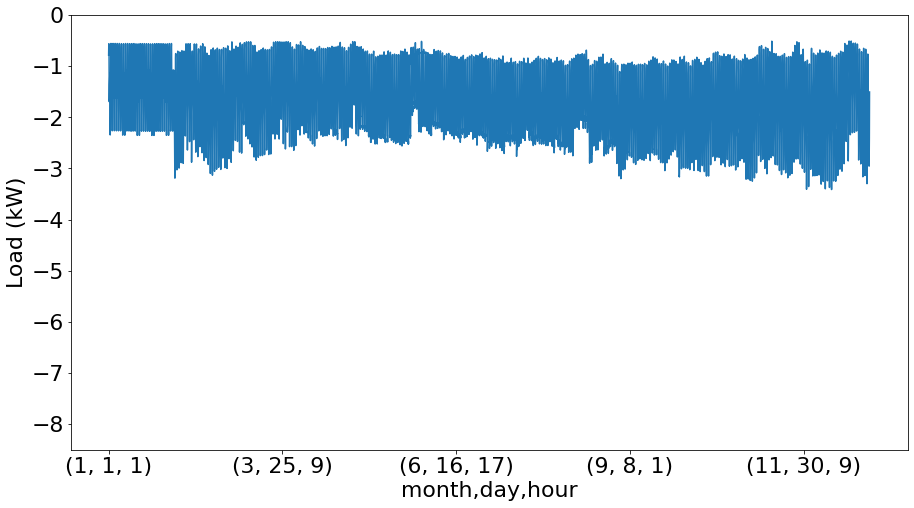

In [14]:
total_elec_load_inverted_hawaii = -load_hawaii['Electricity:Facility [kW](Hourly)'] #invert
total_elec_load_inverted_hawaii.plot(ylabel = 'Load (kW)', ylim = ([-8.5, 0]));

In [15]:
sum(load_hawaii['Electricity:Facility [kW](Hourly)'])

14474.618369949998

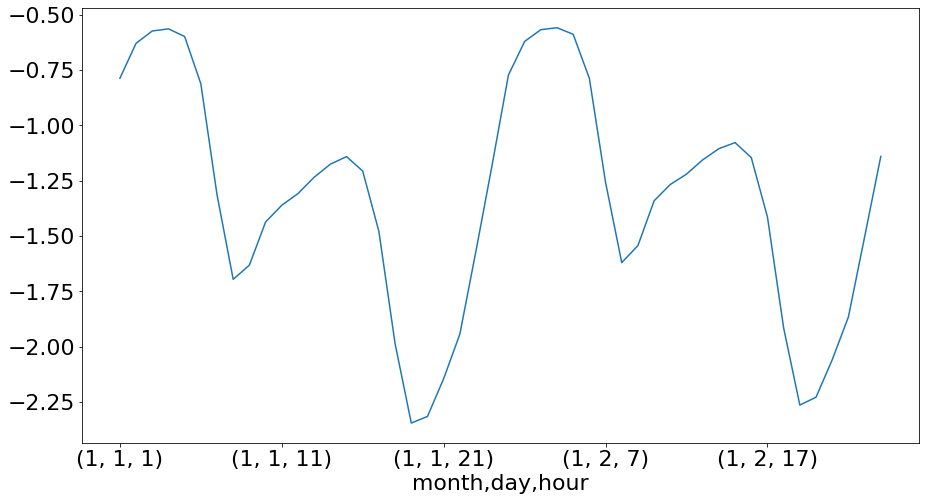

In [16]:
total_elec_load_inverted_hawaii.head(48).plot();

In [17]:
load_hawaii = load_hawaii['Electricity:Facility [kW](Hourly)']

In [18]:
type(load_hawaii)

pandas.core.series.Series

In [19]:
load_hawaii.to_pickle('Calculations/Hawaii/load_hawaii.pkl')